In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [14]:
# get all collaboration data for given hole size and starting year
def get_collabs_by_hole_size(size, start_y):
    file = "myDATA/collabs_by_hole_size_and_start_year/" 
    file += str(size) + "_hole_size_splitted/"
    file += str(start_y) + "_collabs_by_starting_year.csv"
    
    if(os.path.exists(file)):
        return pd.read_csv(file)
    return -1

                ID  2017  2018
2048   57195185389   108   108
9430    7004365626   104   105
10599  24342850300   102   102
5748   56968574700     8    95
8847    6603188175    79    79
...            ...   ...   ...
4328    6603461994     1     1
9709   54999782900     0     1
6258   57194409313     1     1
10828  57195428682     1     1
999     7003386874     1     1

[11220 rows x 3 columns]


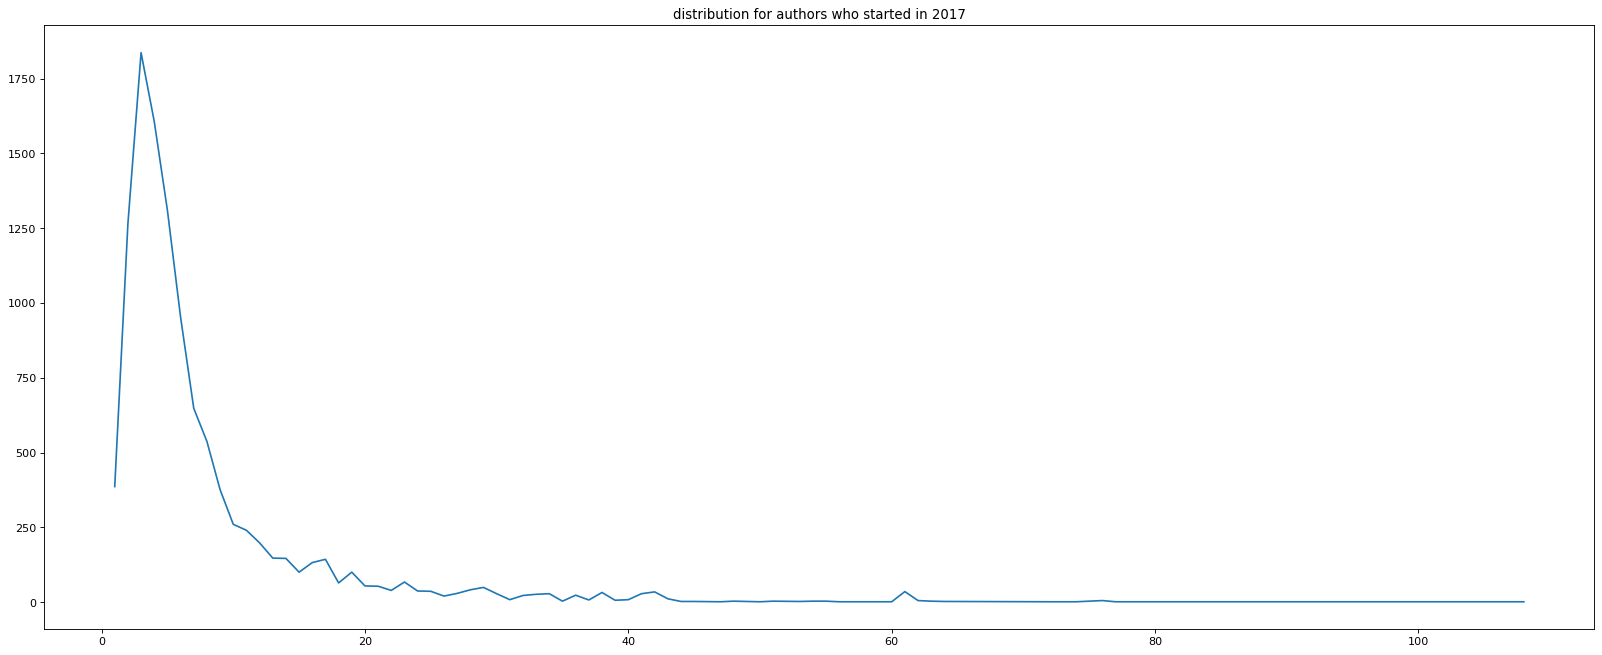

the average number of collaborations in 2017 is  6.507219251336898


In [19]:
# Authors who started in 2017 ordered number of collaborations
df = get_collabs_by_hole_size(28, 2017)
print(df.sort_values('2018', ascending=False))

# Distribution on collaboration 
plt.figure(figsize=(25, 10), dpi=80)
plt.title("distribution for authors who started in 2017")
x = list(set(list(df["2018"])))
y =  []
for i in x:
    y.append(len(df[df["2018"]==i]))

plt.plot(x,y)
plt.show()

print("the average number of collaborations in 2017 is ", np.average(df["2017"], axis=0))

In [16]:
# names 
YEARS = [str(year) for year in range(1990,2019)]

auths = {}
for y in YEARS:
    path = './COMP/COMP/COMP-'+y+'.json'

    with open(path, 'rb') as f:
        data = json.load(f)


    for i in data["search-results"]["entry"]:
        try:
            # author without collaborators
            try:
                id = i["author"]["authid"] 
                name = i["author"]["authname"]
                auths[id] = name
            
            # entry with collaborators (so the author field is an array)
            except:
                for k in range(len(i["author"])):
                    id = i["author"][k]["authid"] 
                    name = i["author"][k]["authname"]
                    auths[id] = name
        except:
            asd=0

print("total num of retrieved authors: ", len(auths))

names = []
unk_count = 0
for id in df["ID"]:
    names.append(auths[str(id)])


total num of retrieved authors:  260323


In [20]:
df["name"] = names
df.sort_values('2018', ascending=False)

,ID,2017,2018,name
2048,57195185389,108,108,Alam A.
9430,7004365626,104,105,Poncino M.
10599,24342850300,102,102,Chakrabarti A.
5748,56968574700,8,95,Watson S.
8847,6603188175,79,79,Bustos B.
...,...,...,...,...
4328,6603461994,1,1,Kusurkar R.
9709,54999782900,0,1,Mas F.
6258,57194409313,1,1,Almonacid V.
10828,57195428682,1,1,Bertini M.
